In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import *
import math
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

# Features For Clustering:
* First, We will begin by identifying the features our platform will generate
* Then, we will move foward on forming the basis of our model on 3 clusters, based on relational assumptions between our featrues (these assumptions will definetly change over the development of the model, however provide a basis for us to learn how our algorithm would handle data from the platform)

#### Features will be based off of data collected from the website and are comprised of:
* Engagement (X-Axis): Whether a lecture was watched, whether or not the student upvotes other's questions, office hour participation, discussion attendance (bc discussions are much more important now)
* Knowledge relevance (Y-Axis): Were the questions asked by the student relevant to the class? Were they upvoted by other students? Were similar questions asked? 
* Comprehension (Z-Axis): Quiz scores 

# Data Generation Class:
#### Serves to generate data in a way were we can easily manipulate parameters to gain insight into how our model will react to different combinations of clusters/learning styles

In [2]:
class DataGeneration:
    
    
    def __init__(self, num_datapoints, num_weeks, num_clusters):
        
        self.num_datapoints = num_datapoints 
        self.num_weeks = num_weeks
        self.num_clusters = num_clusters

        
    def generate_x(self, dist_min, dist_max):
                x_data  = [random.uniform(dist_min,dist_max) for i in range(self.num_datapoints)]
                
                return x_data 


    def generate_y(self, dist_min, dist_max):
        y_data = [random.uniform(dist_min,dist_max) for i in range(self.num_datapoints)]   

        return y_data


    def generate_z(self, dist_min, dist_max):
        z_data = [random.uniform(dist_min,dist_max) for i in range(self.num_datapoints)] 

        return z_data
    
    
    def generate_data(self, dist_vals):
            
        student_data = []
        x = 0
               
        ### Iterate through week data ###
        for i in range(self.num_weeks):
            week_data = []
            
            ### Iterate through clusters in each week ##
            for x in range(self.num_clusters):
                if i != 0:
                    cluster_data = []
                    cluster_data.append(self.generate_x(dist_vals[x][0][0], dist_vals[x][0][1])) 
                    cluster_data.append(self.generate_y(dist_vals[x][1][0], dist_vals[x][1][1]))
                    cluster_data.append(self.generate_z(dist_vals[x][2][0], dist_vals[x][2][1])) 
                    
                    week_data.append(cluster_data)
                else:
                    cluster_data = []
                    cluster_data.append(self.generate_x(dist_vals[x][0][0], dist_vals[x][0][1]))
                    cluster_data.append(self.generate_y(dist_vals[x][1][0], dist_vals[x][1][1]))
                    cluster_data.append(self.generate_z(dist_vals[x][2][0], dist_vals[x][2][1])) 
                    week_data.append(cluster_data)
            student_data.append(week_data)


        return student_data


    def generate_data2(self, dist_vals):
        
        student_data = []
        x_data = []
        y_data = []
        z_data = []
        
        x = 0
        gen_iter = 1

        for i in range(gen_iter):
            for x in range(3):
                x_data += self.generate_x(dist_vals[x][0][0], dist_vals[0][0][1])
                y_data += self.generate_y(dist_vals[x][1][0], dist_vals[1][1][1])
                z_data += self.generate_z(dist_vals[x][2][0], dist_vals[2][2][1]) 
        student_data.append(x_data)
        student_data.append(y_data)
        student_data.append(z_data)
           
        return student_data

In [12]:
class Visualize():
    
    
    def __init__(self, student_data):
        self.student_data = student_data   
    
    
    def visualize(self, week_num):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        colors = ["r", "g", "b"]
        
        i = 0
        for c in self.student_data[week_num-1]:
            ax.scatter(c[0], c[1], c[2],  color = colors[i], marker='o')
            i +=1
            
        ### Group1AVG: [.35, .35, .5]
        ### Group2AVG: [.75, .5, .25]
        ### Group 3AVG: [.75, .75, .75]
            
#         groups = [[0, .35, .65], [.9, .3, .25],[.9, .75, .8]]
#         for g in groups:
#             ax.scatter(g[0], g[1], g[2], color = "black", marker = 'x', s=200)
            


            
        ax.set_xlabel("Engagement")
        ax.set_ylabel("KnowledgeRelevance")
        ax.set_zlabel("Comprehension")
        plt.tight_layout()
        plt.show()
    

# Week 1 (Pre-Cluster):

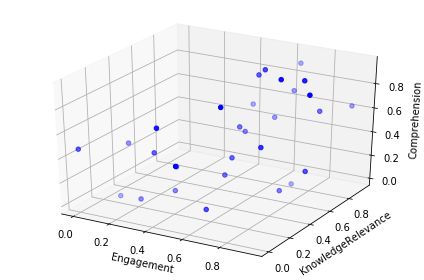

In [13]:
# dist_vals = [[[x1_min,x1_max][y1_min,y1_max][z1_min,z1_max]], [[x2_min,x2_max][y2_min,y2_max][z2_min,z2_max]],
#[[x3_min,x3_max][y3_min,y3_max][z3_min,z3_max]]]

dist_vals1 = [
    [[0,.7],[0,.3],[0,1]], 
    [[.5,1],[0,1],[0,.5]], 
    [[.5,1],[.5,1],[.5,1]]
]

student_data1 = DataGeneration(10,3,3).generate_data(dist_vals1)
vis1 = Visualize(student_data1).visualize(3)


# Week 2 (Pre-Cluster):

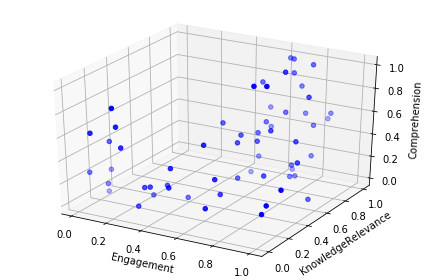

In [14]:
dist_vals2 = [
    [[0,.7],[0,.3],[0,1]], 
    [[.5,1],[0,1],[0,.5]], 
    [[.5,1],[.5,1],[.5,1]]
]

student_data2 = DataGeneration(20,3,3).generate_data(dist_vals2)
vis2 = Visualize(student_data2).visualize(3)


# Week 'n' (Pre-cluster)

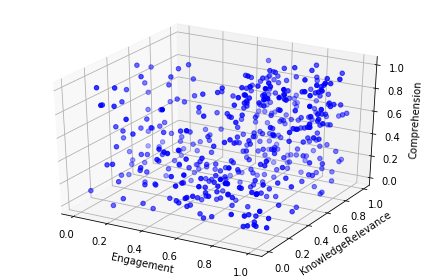

In [15]:
dist_vals3 = [
    [[0,.7],[0,.7],[0,1]], 
    [[.5,1],[0,1],[0,.5]], 
    [[.5,1],[.5,1],[.5,1]]
]

student_data4 = DataGeneration(150,3,3).generate_data(dist_vals3)
vis3 = Visualize(student_data4).visualize(3)

# Clustering Algorithm:
## Simulates clustering algorithm on 'n' weeks worth of data for 3 categories

# Identifying clusters:

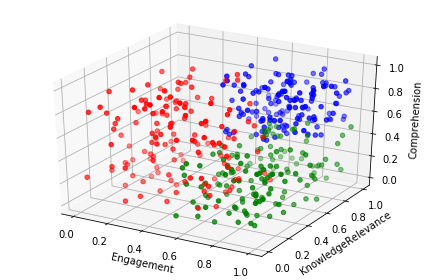

In [7]:
dist_vals3 = [
    [[0,.7],[0,.7],[0,1]], 
    [[.5,1],[0,1],[0,.5]], 
    [[.5,1],[.5,1],[.5,1]]
]


### Group1: [.35, .35, .5]
### Group2: [.75, .5, .25]
### Group 3: [.75, .75, .75]

student_data4 = DataGeneration(150,3,3).generate_data(dist_vals3)
vis3 = Visualize(student_data4).visualize(3)

# Grouping Clusters

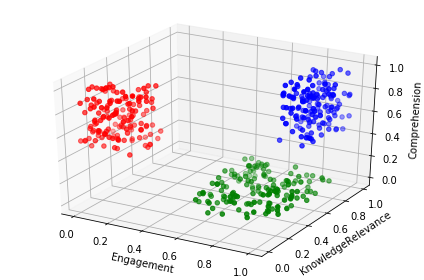

In [8]:
cluster_demo = [
    [[0,.3],[0,.3],[.5,1]], 
    [[.5,1],[.2,.8],[0,.2]], 
    [[.8,1],[.5,1],[.5,1]]
]

student_data5 = DataGeneration(150,3,3).generate_data(cluster_demo)
vis3 = Visualize(student_data5).visualize(3)

In [9]:
cluster_demo = [
    [[0,.3],[0,.3],[.5,1]], 
    [[.5,1],[.2,.8],[0,.2]], 
    [[.8,1],[.5,1],[.5,1]]
]

student_data3 = DataGeneration(150,3,3).generate_data2(cluster_demo)
student_data3 = np.array(student_data3).T
df = pd.DataFrame(data=student_data3, columns = ["x_data", "y_data", "z_data"])

df


,x_data,y_data,z_data
0,0.281107,0.342443,0.879257
1,0.189409,0.326195,0.554107
2,0.189682,0.418516,0.996365
3,0.115031,0.396519,0.595559
4,0.232360,0.607512,0.639776
...,...,...,...
445,0.302523,0.694130,0.894272
446,0.365274,0.687643,0.631730
447,0.695439,0.752372,0.602350
448,0.429073,0.522915,0.937269


In [10]:
y = DataGeneration(150,3,3).generate_data2(cluster_demo)
y = np.array(y).T

X = student_data3

kmeans = KMeans(n_clusters=2)
kmeans.fit(student_data3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
## starter code for test-train accuracy test ###

# correct = 0
# for i in range(len(X)):
#     predict_me = np.array(X[i].astype(float))
#     predict_me = predict_me.reshape(-1, len(predict_me))
#     prediction = kmeans.predict(predict_me)
#     if prediction[0] == y[i]:
#         correct += 1

# print(correct/len(X))